# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-data-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "0" não são bem classificados 

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.preprocessing as pp
D=pickle.load(open('PreparacaoLaboratorio4/Lab4-data-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [338]:
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

In [339]:
print(X1.shape)
print(y1.shape)

print(X2.shape)
print(y2.shape)

(2, 400)
(400,)
(2, 3600)
(3600,)


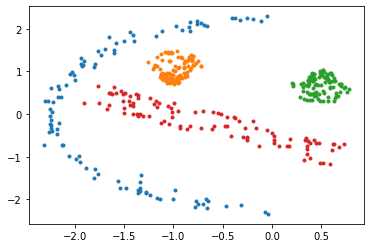

In [340]:
plt.plot(X1[0, y1==0], X1[1, y1==0], '.')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.')

In [344]:
poly = pp.PolynomialFeatures(4).fit(X1.T)
Xp = poly.transform(X1.T).T

Y = -np.ones((4, X1.shape[1]))

for i in range(4):
    Y[i, y1==i] = 1
    
Rx = np.dot(Xp, Xp.T)
rxy = np.dot(Xp, Y.T)
W = np.dot(la.pinv(Rx), rxy)

yb = np.dot(W.T, Xp)
ye = np.argmax(yb, axis=0)

## 1.b)

In [342]:
X2p = poly.transform(X2.T).T
y2b = np.dot(W.T, X2p)
y2e = np.argmax(y2b, axis=0)

print("Número Total de Erros Treino: ", np.sum(y1!=ye))
print(confusion_matrix(y1, ye))
print()
print("Número Total de Erros Teste: ", np.sum(y2 != y2e))
print(confusion_matrix(y2, y2e))

Número Total de Erros Treino:  1
[[ 99   0   0   1]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]

Número Total de Erros Teste:  484
[[419 325  55 101]
 [  0 900   0   0]
 [  0   0 900   0]
 [  3   0   0 897]]


## 1.c)

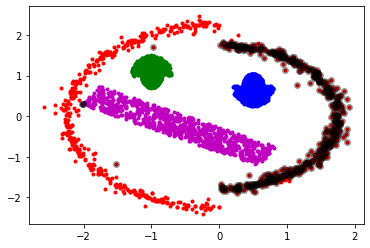

In [313]:
plt.plot(X2[0, y2==0], X2[1, y2==0], '.r')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.g')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.b')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.m')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok', alpha=0.3)

## 1.d)

Como podemos observar no "plot" dos dados de treino, apenas foram tidos em conta os pontos que se encontravam no lado esquerdo da sua distribuição.

O discriminante, ao encontrar estes pontos do lado direito, quando analisando os dados de teste, assume serem de outra classe dado que não encontrou nenhum ponto da classe 0 nesses locais.  

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-data-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [314]:
D=pickle.load(open('PreparacaoLaboratorio4/Lab4-data-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

(500,)
(500,)


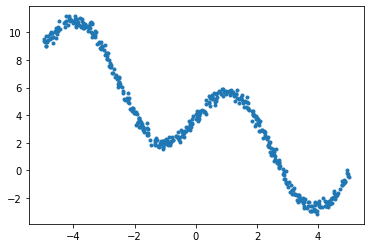

In [315]:
x = D['x']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']

print(x.shape)
print(y.shape)

plt.plot(x, y, '.')

In [316]:
#Treino
x1 = x[f1]
y1 = y[f1]

#plt.plot(x1, y1, '.')

#Teste
x2 = x[f2]
y2 = y[f2]

#plt.plot(x2, y2, '.')

## 2.a)

In [317]:
X1=np.vstack((x1**5, x1**4, x1**3,x1**2,x1,np.ones((1, x1.shape[0]))))
Rx=np.dot(X1,X1.T) # matriz 6 × 6
rxy=np.dot(X1,y1.T) # vetor 6 × 1

w=np.dot(np.linalg.pinv(Rx), rxy)

print(w)

[ 0.00883479  0.03881964 -0.45238482 -0.25033723  1.66738131  3.94647968]


## 2.b)

In [318]:
yh=np.dot(w.T, X1)

my1=np.mean(y1) # media de ´ y
SQtot=np.sum((y1-my1)**2)# soma dos quadrados de y
SQres=np.sum((y1-yh)**2)# potencia do erro ˆ
R2=1.0-SQres/SQtot

print(R2)

0.961163242355513


## 2.c)

-0.8716026083338004


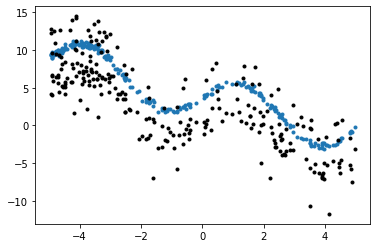

In [335]:
#Dados Teste
plt.plot(x2, y2, '.')

#Polinómio Estimado
plt.plot(x2, (y2-yh), '.k')
#plt.plot(x2, yh, '.k')

my2=np.mean(y2) # media de ´ y
SQtot=np.sum((y2-my2)**2)# soma dos quadrados de y
SQres=np.sum((y2-yh)**2)# potencia do erro ˆ
R2=1.0-SQres/SQtot

print(R2)

## 2.d)

O facto do R2 possuir um valor negativo é um claro sinal que as coisas estão a ser muito mal classificadas.<br>
Um valor negativo significa que a potência do erro varia mais que os próprios y's. <br>

Este modelo está a ter um bom desempenho para os dados de treino, mas ao chegar aos de teste falha redondamente.

Pode-se concluir que o modelo está a entrar em sobreaprendizagem.

Quanto maior for a ordem do polinómio do modelo, mais fácil é esse modelo entrar em sobreaprendizagem